---
<img src="https://ead.ufes.br/pluginfile.php/188418/course/summary/Banner%20IA%20e%20CD.png" style="float: right;">


#  Agrupamento  ou clusterização

Uma visão geral sobre algoritmos de agrupamento.

Não se apegue aqui com os detalhes da linguagem, você verá Python na próxima disciplina.

**Objetivo**

A intenção desse notebook é explicar e exemplificar o uso de algoritmos de clusterização.

**Resultados Esperados**

1. Compreender clusterização
1. Executar o k-means
1. Compreender o método do cotovelo para definir número de grupos.

# 1. Introdução à Clusterização

Clusterização é uma técnica de aprendizado não supervisionado usada para agrupar dados que possuem características similares.
Os algoritmos de clusterização tentam organizar um conjunto de objetos em clusters, onde os objetos dentro do mesmo cluster são mais semelhantes entre si do que com objetos de outros clusters.  A ideia geral é minimizar a variação dentro de cada cluster e maximizar a variação entre diferentes clusters.


A imagem abaixo apresenta o roadmap para definição de algoritmos do scikit-learn.

Nesta aula, iremos fazer  a geração de dados sintéticos e aplicação básica de K-Means, pois este é um dos algoritmos mais clássicos para clusterização. Em seguida, definiremos e utilizaremos o método do cotovelo  Por fim, aplicamos a clusterização com um Dataset Real.

Exemplos de algoritmos:
- [Kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) (vimos este na aula de agrupamento)
- DBScan
- Birch

## Scikit-Learn - Mapa de algoritmos disponíves

[<img src="https://scikit-learn.org/1.3/_static/ml_map.png" style="float: right;">](https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html)


## O Problema do Agrupamento

Dada uma coleção de objetos $X = \{x_1, x_2, \dots, x_n\}$, o objetivo é dividir os elementos de $X$ em grupos de forma que:
1. Elementos do mesmo grupo **sejam** "similares"
2. Elementos de grupos diferentes **não sejam** "similares"

Dentro de aprendizado de máquina, o problema de agrupamento está na categoria de **aprendizado não supervisionado**. Essa denominação é dada pois o objetivo é aprender a partir de dados não rotulados.


## Geração de dados sintéticos

Inicialmente, iremos utilizar a biblioteca `datasets` para gerar um conjunto de dados aleatórios, mas que apresentem alguma característica de agrupamento.

Observe que os dados não tem rótulos. Logo, estamos falando de aprendizado não supervisionado.

Em seguida, vamos tentar clusterizar os dados do primeiro gráfico.

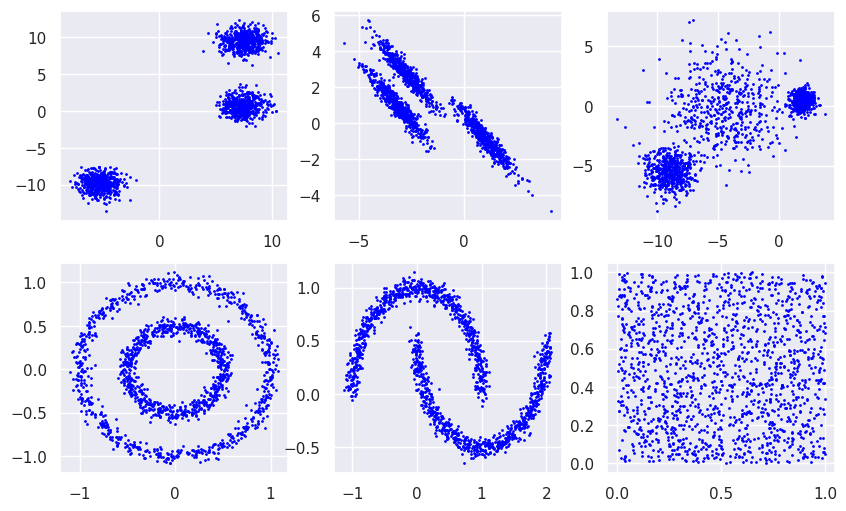

In [1]:
#@title Geração de dados sintéticos

import numpy as np
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

np.random.seed(0)
n_samples = 1500

# circles
noisy_circles, _ = datasets.make_circles(n_samples=n_samples, factor=.5,
                                         noise=.05)

# moons
noisy_moons, _ = datasets.make_moons(n_samples=n_samples, noise=.05)

# blobs
blobs, _ = datasets.make_blobs(n_samples=n_samples, random_state=8)

# no structure
no_structure = np.random.rand(n_samples, 2)

# elipses
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# blobs with varied variances
varied, _ = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

def plot_figure_example(color):
  f, axarr = plt.subplots(2, 3, figsize=(10, 6))
  axarr[0, 0].scatter(blobs[:, 0], blobs[:, 1], s = 1, c = color[0])
  axarr[0, 1].scatter(aniso[:, 0], aniso[:, 1], s = 1, c = color[1])
  axarr[0, 2].scatter(varied[:, 0], varied[:, 1], s = 1, c = color[2])
  axarr[1, 0].scatter(noisy_circles[:, 0], noisy_circles[:, 1], s = 1,
                      c = color[3])
  axarr[1, 1].scatter(noisy_moons[:, 0], noisy_moons[:, 1], s = 1, c = color[4])
  axarr[1, 2].scatter(no_structure[:, 0], no_structure[:, 1], s = 1,
                      c = color[5])

plot_figure_example([["blue"] for _ in range(6)])

Dado os conjunto de pontos acima, se você pudesse escolher **três** pontos para sumarizar cada conjunto de dados, aonde você colocaria cada um deles?

Essa é a intuição por trás do K-means

## K-means

O algoritmo K-Means visa particionar um conjunto de n pontos de dados em k clusters, onde cada ponto de dado pertence ao cluster com o centróide (centro do cluster) mais próximo, minimizando a distância dentro dos clusters. O K-Means funciona da seguinte maneira:

1. Escolha um número k, que representa o número de clusters que você deseja encontrar nos dados.

1. Inicialize k centróides de forma aleatória. Cada centróide é um ponto no espaço de características (dimensões) que representa o centro de um cluster.

1. Para cada ponto de dado, calcule a distância entre o ponto e cada um dos k centróides. A distância mais comum usada é a distância Euclidiana.
Atribua cada ponto de dado ao cluster cujo centróide esteja mais próximo (menor distância).

1.  Após atribuir todos os pontos de dados aos clusters, recalcule a posição dos centróides. O novo centróide de cada cluster é a média dos pontos de dados atribuídos a ele.

1.  Repita os passos de atribuição e atualização até que os centróides não mudem mais de posição (ou mudem muito pouco).  Alternativamente, pode-se parar após um número fixo de iterações.

**Observações:**
1. O passo (1) é particularmente problemático. Uma inicialização ruim pode levar o algoritmo a uma péssima separação de grupos. Uma heuristica muito utilizada (e padrão na ``scikit-learn``) é chamada de $k$-means++.
2. O algoritmo acima foi proposto por Lloyd, em 1957. Por isso, é conhecido como algoritmo de Lloyd.
3. Muitas vezes, o algoritmo acima é chamado de $k$-means. Apesar de essa ser uma denominação muito popular (e presente em vários livros), $k$-means é o nome do problema.




In [2]:
# Aplicação do algoritmo K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(blobs)
y_kmeans = kmeans.predict(blobs)

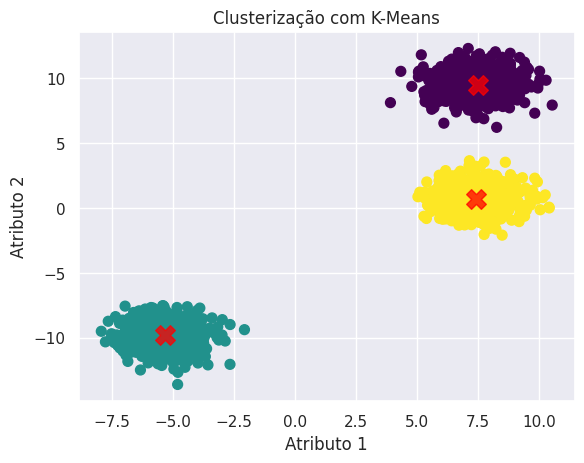

In [ ]:
#@title Visualização dos resultados da clusterização
plt.scatter(blobs[:, 0], blobs[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Clusterização com K-Means")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.show()

### Quantos grupos?

**Não** há um único algoritmo que seja capaz de produzir bons resultados em todas as situações. Por isso, precisamos estudar e entender bem soluções de diferentes paradigmas!

Neste exemplo, é possível visualizar que os dados possuem 3 grupos relativamente distintos e por isto definimos `k=3`.  
Em diversos casos, não é possível saber isto, e é aplicado o algoritmo Elbow (cotovelo)

## Método do cotovelo

Uma das decisões mais importantes ao usar algoritmos de clusterização, como o K-Means, é a escolha do número de clusters `k`. Escolher um valor apropriado para `k` pode ser desafiador, pois valores muito pequenos ou muito grandes podem não capturar a estrutura subjacente dos dados de maneira adequada. O `método do Elbow` (cotovelo) é uma abordagem comumente usada para determinar um valor apropriado de k de forma empírica.

$k$ é um exemplo de **hiperparâmetro**. Informalmente, um hiperparâmetro é uma quantidade importante para o algoritmo, mas que deve ser fornecida pelo usuário.

O processo de escolha de hiperparâmetros é de extrema importância em aprendizado de máquina.

É uma tarefa particularmente complicada em aprendizado não supervisionado (e.g., agrupamento). É uma tarefa mais simples (do ponto de vista procedimental) em aprendizado supervisionado.

No caso do  k-means, uma abordagem comum/clássica é recorrer à heurística de Elbow ou do "cotovelo" (em algum lugares, "joelho").

Para isso, vamos observar o erro do agrupamento (que é o valor da função objetivo) para vários valores de  k.

O método do Elbow baseia-se na análise da inércia, que é  a soma das distâncias quadradas de cada ponto aos seus respectivos centróides.

Text(0.55, 0.55, 'Cotovelo')

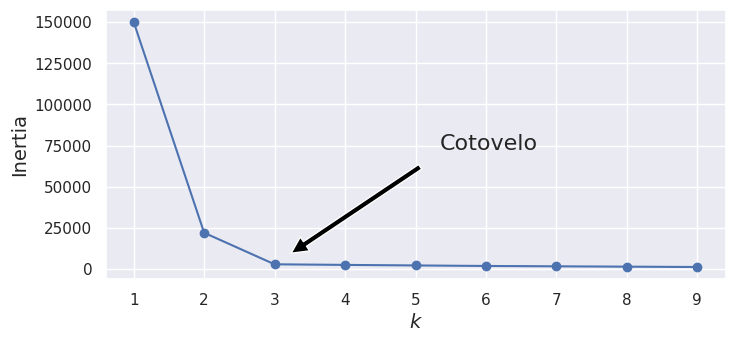

In [3]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(blobs) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Cotovelo',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
#plt.axis([1, 8.5, 0, 1300])

No caso do exemplo acima, veja que o erro para de cair significativamente para $k \ge 3$. Esse tipo de comportamento sugere que $k = 3$ é uma boa escolha.

## Saída do algoritmo para os exemplos anteriores


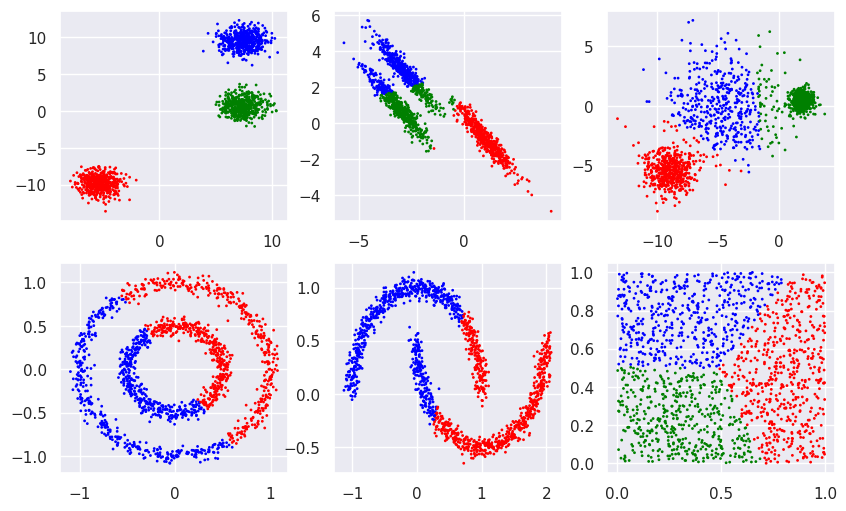

In [4]:
#@title kmeans para todos os datasets sintéticos
def exec_model(dataset, model, params):
  labels = []
  if model == cluster.DBSCAN:
    for idx, param in enumerate(params):
      km = model(eps = param[0], min_samples = param[1])
      km.fit(dataset[idx])
      labels.append(km.labels_)
  elif model == cluster.SpectralClustering:
    for idx, param in enumerate(params):
      km = model(param, affinity='nearest_neighbors')
      km.fit(dataset[idx])
      labels.append(km.labels_)
  else:
    for idx, param in enumerate(params):
      km = model(param, n_init=10)
      km.fit(dataset[idx])
      labels.append(km.labels_)
  color = "blue red green yellow black purple".split()
  c = []
  for label in labels:
    c.append([color[w] for w in label])
  return c

dataset = [blobs, aniso, varied, noisy_circles, noisy_moons, no_structure]
n_groups = [3, 3, 3, 2, 2, 3]
colors = exec_model(dataset, cluster.KMeans, n_groups)
plot_figure_example(colors)

# Agrupamento em um dado real

Agora, vamos usar um dataset real, o famoso dataset Iris, que contém 3 tipos de flores e 4 características para cada flor.


## Carregando o dataset.



In [5]:
from sklearn.preprocessing import StandardScaler

# Carregamento do dataset Iris
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# Normalização dos dados
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

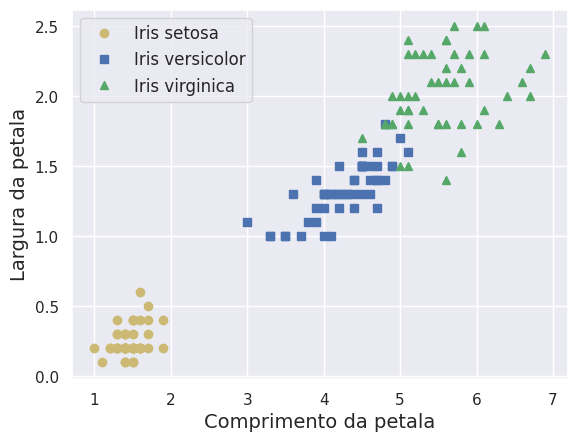

In [6]:
#@title  Visualizando o conjunto de dados
#plt.figure(figsize=(9, 3.5))
plt.plot(X_iris[y_iris==0, 2], X_iris[y_iris==0, 3], "yo", label="Iris setosa")
plt.plot(X_iris[y_iris==1, 2], X_iris[y_iris==1, 3], "bs", label="Iris versicolor")
plt.plot(X_iris[y_iris==2, 2], X_iris[y_iris==2, 3], "g^", label="Iris virginica")
plt.xlabel("Comprimento da petala", fontsize=14)
plt.ylabel("Largura da petala", fontsize=14)
plt.legend(fontsize=12)

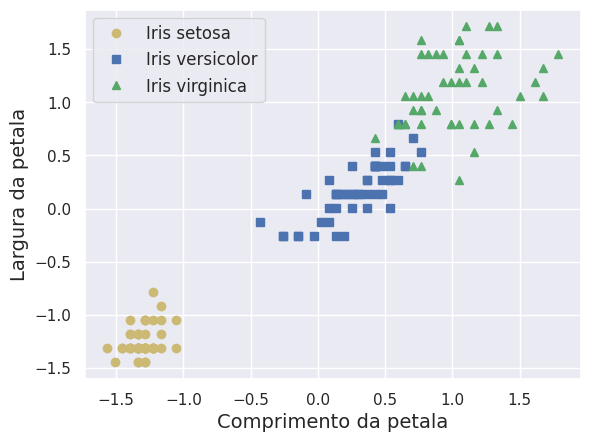

In [7]:
#@title  Visualizando o conjunto de dados normalizado
#plt.figure(figsize=(9, 3.5))
plt.plot(X_iris_scaled[y_iris==0, 2], X_iris_scaled[y_iris==0, 3], "yo", label="Iris setosa")
plt.plot(X_iris_scaled[y_iris==1, 2], X_iris_scaled[y_iris==1, 3], "bs", label="Iris versicolor")
plt.plot(X_iris_scaled[y_iris==2, 2], X_iris_scaled[y_iris==2, 3], "g^", label="Iris virginica")
plt.xlabel("Comprimento da petala", fontsize=14)
plt.ylabel("Largura da petala", fontsize=14)
plt.legend(fontsize=12)

## Executando o k-means

Iremos executar o k-means sob o conjunto de dados normalizado.


In [8]:
#@title Aplicação do K-Means ao dataset Iris
kmeans_iris = KMeans(n_clusters=3, n_init=10)
kmeans_iris.fit(X_iris_scaled)
y_iris_kmeans = kmeans_iris.predict(X_iris_scaled)

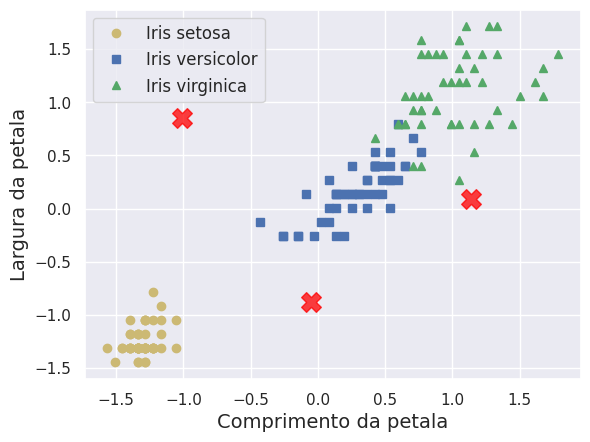

In [9]:
#@title  Visualizando o conjunto de dados normalizado e a posição dos centroides
#plt.figure(figsize=(9, 3.5))
plt.plot(X_iris_scaled[y_iris==0, 2], X_iris_scaled[y_iris==0, 3], "yo", label="Iris setosa")
plt.plot(X_iris_scaled[y_iris==1, 2], X_iris_scaled[y_iris==1, 3], "bs", label="Iris versicolor")
plt.plot(X_iris_scaled[y_iris==2, 2], X_iris_scaled[y_iris==2, 3], "g^", label="Iris virginica")
centers = kmeans_iris.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel("Comprimento da petala", fontsize=14)
plt.ylabel("Largura da petala", fontsize=14)
plt.legend(fontsize=12)

**Centróides estão longe! Por que? **


Relembre-se que a base de dados Iris tem 4 atributos e aqui estamos plotando apenas 2 de seus atributos!!!  

Para ver os centróides corretamente, devemos fazer a redução de dimensão dos 4 atributos para 2 dimensões.  

**Isso é o assunto da próxima aula!!**


> Mas segue um *spoiler* abaixo!


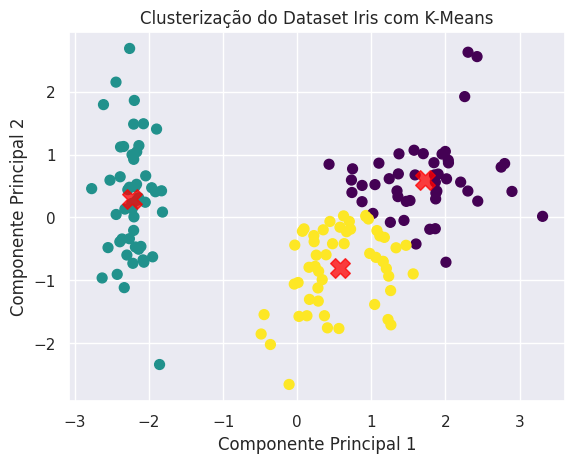

In [10]:
#@title Visualização dos resultados em duas dimensões principais
from sklearn.decomposition import PCA
pca = PCA(2)
X_iris_pca = pca.fit_transform(X_iris_scaled)

plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_iris_kmeans, s=50, cmap='viridis')
centers_iris = kmeans_iris.cluster_centers_
centers_iris_pca = pca.transform(centers_iris)
plt.scatter(centers_iris_pca[:, 0], centers_iris_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Clusterização do Dataset Iris com K-Means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

## Exercícios


### 1. Adicionando mais rúidos aos dados.

Adicione ruído ao conjunto de dados original (com 4 centros) aumentando o valor de cluster_std para 1.0 e observe como isso afeta o gráfico do Elbow. O que você percebe?

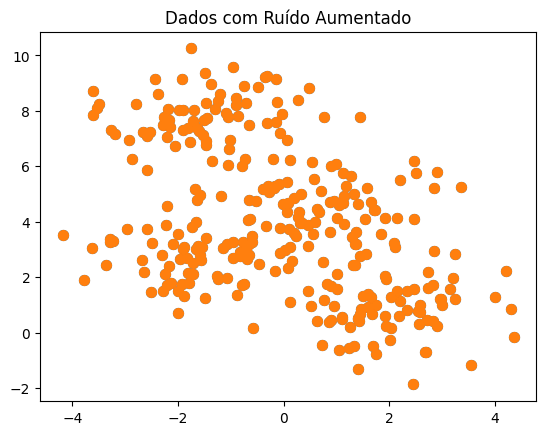

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

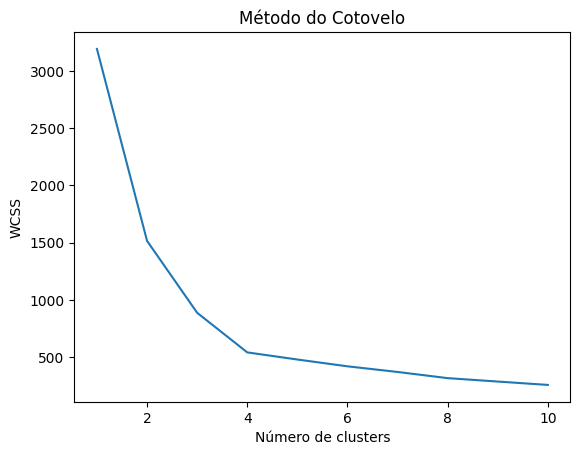

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# Aumento do desvio padrão para adicionar ruído
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
# Plotando os dados
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Dados com Ruído Aumentado")
plt.show()

# Criando o gráfico do cotovelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
  # Within-Cluster Sum of Squares
plt.show()


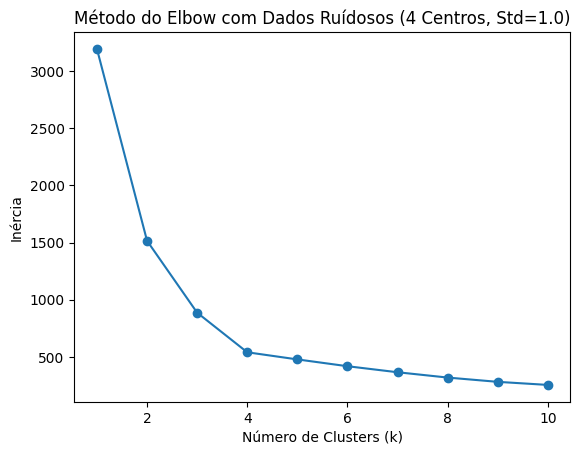

In [3]:
#@title Visualização dos resultados da clusterização

from sklearn.datasets import make_blobs

# Aumento do desvio padrão para adicionar ruído
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=0)

# Lista para armazenar a inércia para diferentes valores de k
inertia = []

# Testar o K-Means para diferentes valores de k (1 a 10)
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotar a inércia em função de k
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Elbow com Dados Ruídosos (4 Centros, Std=1.0)')
plt.show()


#### O que aconteceu?

Quantos grupos são necessários para esta base de dados?

Altere o valor de K abaixo e execute o código em seguida novamente para ver o efeito do agrupamento.

In [6]:
K=17 #@param {type:"slider", min:1, max:20, step:1}

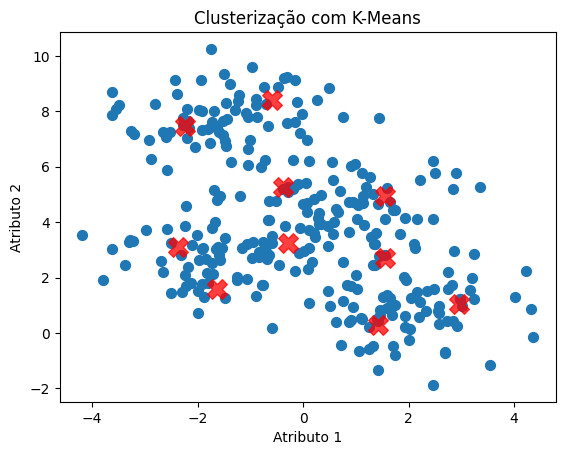

In [7]:
#@title Execute para visualizar o efeito da alteração de K
kmeans = KMeans(n_clusters=K, random_state=0, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Clusterização com K-Means")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.show()
